In [3]:
using PyPlot
using Revise
using Distributions


┌ Warning: no Manifest.toml file found, static paths used
└ @ Revise /home/katka/.julia/packages/Revise/moD4B/src/packagedef.jl:1361


In [20]:
function grad_w(X,y,w,b)
    return transpose(X)*(X*w + b - y)
end

function grad_b(X,y,w,b)
    g = 0
    
    for i=1:size(X)[1]
        g = g + sum(X[i,:].*w) + b[i] -y[i]
    end
    
    return g
end

function grad_descend(X,y,w0,b0, step_w, step_b, l1, l2)
    i = 0
    g_norm_w = 1.0    
    g_norm_b = 1.0
    
    while (i<5.0e6 && (g_norm_w > 0.025 || g_norm_b > 0.025))
        
        i=i+1
        g_w = grad_w(X,y,w0,b0) .+ l1.*w0
        g_b = grad_b(X,y,w0,b0) .+ l2.*b0
        
        w1 = w0 .- step_w.*(g_w)
        b1 = b0 .- step_b.*(g_b)
        
        w0 = w1
        b0 = b1
        
        g_norm_w = sqrt(sum(g_w.*g_w))
        g_norm_b = sqrt(g_b[1]*g_b[1])

        
        if mod(i, 1.0e5)==0
            println("iter = ", i)
            println("  w = ", w0, ",  b = ", b0[1])
            println("g norm w = ", g_norm_w)
            println("g norm b = ", g_norm_b)
            println()
        end
    end 
    
    return w0, b0
end

grad_descend (generic function with 1 method)

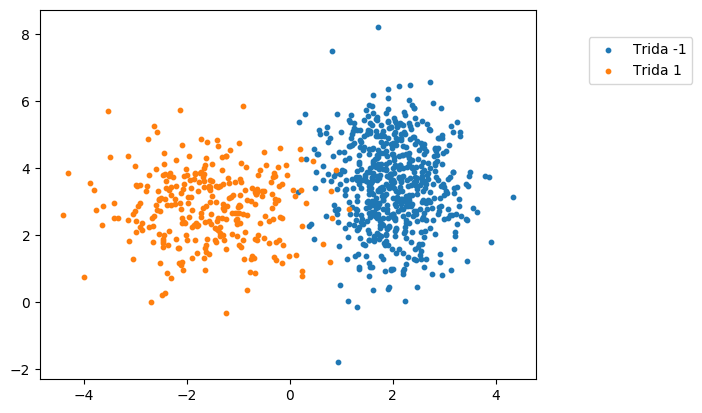

PyObject <matplotlib.legend.Legend object at 0x7f45ab1a6410>

In [38]:
# generovani 2D dat

mean1 = [2.,3.5]
C = [0.5 0; 0 1.8]
d = MvNormal(mean1, C)
x1 = rand(d, 600)'

mean2 = [-1.5,2.75]
C2 = [0.9 0; 0 1.1]
d2 = MvNormal(mean2, C2)
x2 = rand(d2, 300)'

y1 = -1.0.*ones(size(x1)[1])
y2 = ones(size(x2)[1])

X = vcat(x1,x2)
y = vcat(y1,y2)

fig = figure()
PyPlot.scatter(x1[:,1],x1[:,2], s=10, label="Trida -1")
PyPlot.scatter(x2[:,1],x2[:,2], s=10, label="Trida 1")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)



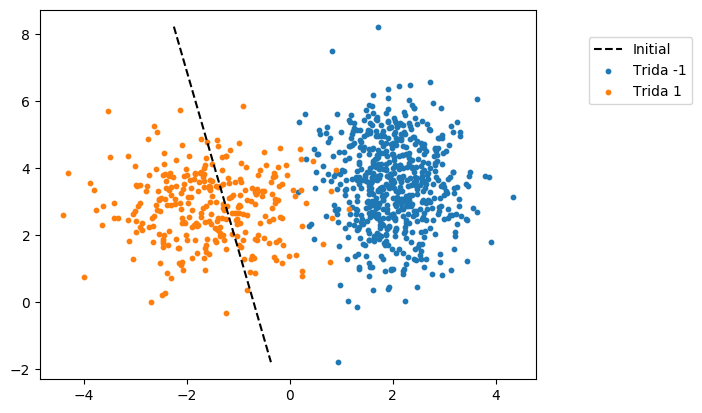

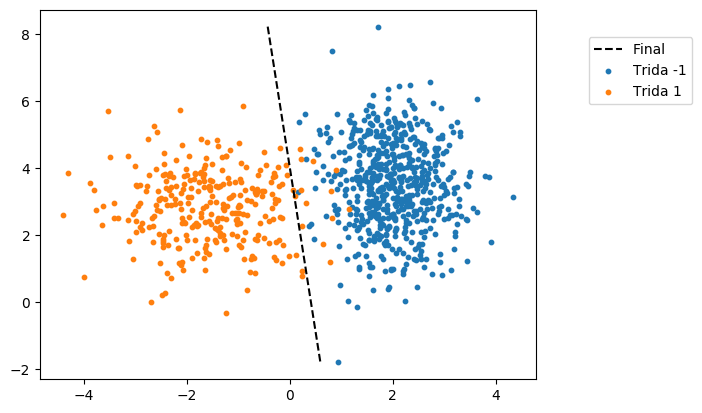

w0 = [-3.5640411165654085, -0.6707046827286507]


PyObject <matplotlib.legend.Legend object at 0x7f45ab0e2050>

In [39]:
# regularizace 
l1 = 0.0
l2 = 0.0

# inicializace
b0 = rand(-5.0:0.0001:5.0).*ones(size(X)[1])
x1 = X[:,1]
x2 = X[:,2]
c1 = [mean(x1[y.==-1]), mean(x2[y.==-1])]
c2 = [mean(x1[y.==1]), mean(x2[y.==1])]
w0 = c2 - c1
println("w0 = ", w0)


y_max = maximum(X[:,2])
y_min = minimum(X[:,2])

x_max = (-b0[1] .- w0[2].*y_max)./ w0[1]
x_min = (-b0[1] .- w0[2].*y_min)./ w0[1]
x_vis = collect(min(x_min,x_max): 0.001: max(x_min,x_max))
line0 = (-b0[1] .- w0[1].*x_vis)./ w0[2]


fig = figure()
PyPlot.scatter(x1[y.==-1],x2[y.==-1], s=10, label="Trida -1")
PyPlot.scatter(x1[y.==1], x2[y.==1], s=10, label="Trida 1")
PyPlot.plot(x_vis, line0, "k--", label = "Initial")


legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


##########################################################

w, b = grad_descend(X,y,w0,b0, 1.0e-6, 1.0e-5, l1, l2)


x_max = (-b[1] .- w[2].*y_max)./ w[1]
x_min = (-b[1] .- w[2].*y_min)./ w[1]
x_vis = collect(min(x_min,x_max): 0.001: max(x_min,x_max))

line = (-b[1] .- w[1].*x_vis)./ w[2]


fig = figure()
PyPlot.scatter(x1[y.==-1],x2[y.==-1], s=10, label="Trida -1")
PyPlot.scatter(x1[y.==1], x2[y.==1], s=10, label="Trida 1")
PyPlot.plot(x_vis, line, "k--", label = "Final")


legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)




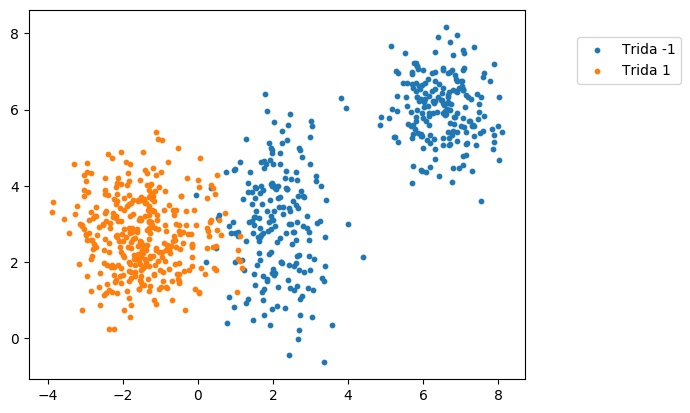

PyObject <matplotlib.legend.Legend object at 0x7f45ab6f9210>

In [30]:
# generovani 2D dat

mean1 = [2.,3.]
C = [0.5 0; 0 1.8]
d = MvNormal(mean1, C)
x1 = rand(d, 200)'

mean2 = [-1.5,2.75]
C2 = [0.9 0; 0 1.1]
d2 = MvNormal(mean2, C2)
x2 = rand(d2, 350)'

mean3 = [6.5,6.]
C3 = [0.5 0; 0 0.8]
d3 = MvNormal(mean3, C3)
x3 = rand(d3, 200)'

y1 = -1.0.*ones(size(x1)[1])
y2 = ones(size(x2)[1])
y3 = -1.0.*ones(size(x3)[1])

x1 = vcat(x1,x3)
y1 = vcat(y1,y3)

X = vcat(x1,x2)
y = vcat(y1,y2)

fig = figure()
PyPlot.scatter(x1[:,1],x1[:,2], s=10, label="Trida -1")
PyPlot.scatter(x2[:,1],x2[:,2], s=10, label="Trida 1")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)

w0 = [-5.754337250383161, -1.7990207573415296]
w final = 

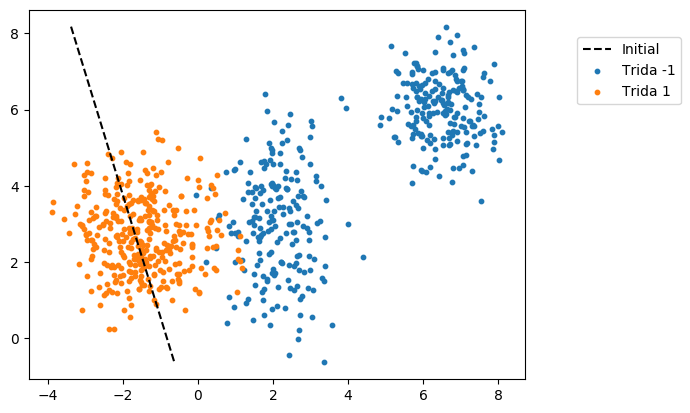

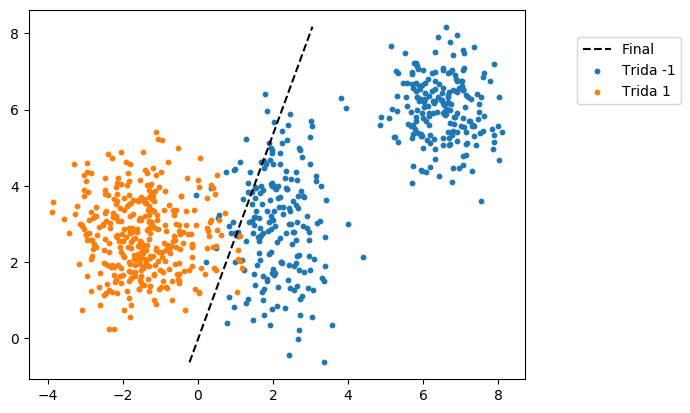

[-0.2878032621307086, 0.10709450829638403]


PyObject <matplotlib.legend.Legend object at 0x7f45ab52f090>

In [32]:
# regularizace 
l1 = 0.0
l2 = 0.0

# inicializace
b0 = rand(-5.0:0.0001:5.0).*ones(size(X)[1])
x1 = X[:,1]
x2 = X[:,2]
c1 = [mean(x1[y.==-1]), mean(x2[y.==-1])]
c2 = [mean(x1[y.==1]), mean(x2[y.==1])]
w0 = c2 .- c1
println("w0 = ", w0)


y_max = maximum(X[:,2])
y_min = minimum(X[:,2])

x_max = (-b0[1] .- w0[2].*y_max)./ w0[1]
x_min = (-b0[1] .- w0[2].*y_min)./ w0[1]
x_vis = collect(min(x_min,x_max): 0.001: max(x_min,x_max))
line0 = (-b0[1] .- w0[1].*x_vis)./ w0[2]


fig = figure()
PyPlot.scatter(x1[y.==-1],x2[y.==-1], s=10, label="Trida -1")
PyPlot.scatter(x1[y.==1], x2[y.==1], s=10, label="Trida 1")
PyPlot.plot(x_vis, line0, "k--", label = "Initial")

legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)


##########################################################

w, b = grad_descend(X,y,w0,b0, 1.0e-6, 1.0e-5, l1, l2)

println("w final = ", w)

x_max = (-b[1] .- w[2].*y_max)./ w[1]
x_min = (-b[1] .- w[2].*y_min)./ w[1]
x_vis = collect(min(x_min,x_max): 0.001: max(x_min,x_max))

line = (-b[1] .- w[1].*x_vis)./ w[2]


fig = figure()
PyPlot.scatter(x1[y.==-1],x2[y.==-1], s=10, label="Trida -1")
PyPlot.scatter(x1[y.==1], x2[y.==1], s=10, label="Trida 1")
PyPlot.plot(x_vis, line, "k--", label = "Final")


legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=2.0)